<a href="https://colab.research.google.com/github/aummzz/MADT8101/blob/main/Review_CQK_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pythainlp
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<

In [2]:
pip uninstall numpy

Found existing installation: numpy 1.25.2
Uninstalling numpy-1.25.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.25.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-5007b62f.3.23.dev.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.25.2


In [3]:
pip install numpy==1.22

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 29.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.1 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.22.0 which is incompatible.
plotnine 0.12.2 requires numpy>=1.23.0, but you have numpy 1.22.0 which is incompatible.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.22.0 which is incompatible.


In [4]:
import pandas as pd
import numpy as np
import pythainlp
import gensim
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.cCJzvQqQej/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.OF9Pd2WHu8/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.vF69wI0yCv/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 https://cloud.r-project.org/bin/l

In [6]:
!apt-get update
!apt-get upgrade
!apt-get install -y unzip xvfb libxi6 libgconf-2-4
!pip install pyvirtualdisplay
!pip install xvfbwrapper

# Download and install the compatible version of ChromeDriver
!wget https://chromedriver.storage.googleapis.com/90.0.4430.24/chromedriver_linux64.zip
#!wget https://chromedriver.storage.googleapis.com/116.0.5845.36/chromedriver_linux64.zip
!unzip chromedriver_linux64.zip
!chmod +x chromedriver
!mv chromedriver /usr/local/bin

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://deb.debian.org/debian buster-updates InRelease
Hit:3 http://deb.debian.org/debian-security buster/updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

In [7]:
#loading data

df = pd.read_csv('Review_CQK.csv')

In [8]:
df.head()

,Review_ID,Review
0,1,คุ้มค่า อร่อย ที่1 ราคาต่อหัว: 251 - 500 บาท ย...
1,2,ร้านใหญ่ เมนูแต่ละอย่าง ชิ้นใหญ่ สด คุ้มค่า บร...
2,3,ร้านหม้อไฟหม่าล่า จีนแท้ๆ ย่านเหม่งจ๋าย ราคาต่...
3,4,อร่อยกว่าร้านดังในห้างมากกกกก ราคาต่อหัว: 501 ...
4,5,ยกหม่าล่าเมืองจีนมาไว้แล้วที่นี่.. ห้วยขวาง รา...


In [9]:
!pip install --upgrade pip
!pip install --upgrade gensim
!pip install --upgrade pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for gensim from https://files.pythonhosted.org/packages/e8/d9/104988573fd2c1acdc64e66883b35fb8ae559310d2d9f77db78bf7de9add/gensim-4.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 49.3 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.22.0 which is incompatible.


  Obtaining dependency information for numpy>=1.24.2 from https://files.pythonhosted.org/packages/71/3c/3b1981c6a1986adc9ee7db760c0c34ea5b14ac3da9ecfcf1ea2a4ec6c398/numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
Using cached numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


In [10]:
from pythainlp import word_tokenize, Tokenizer
from pythainlp.corpus.common import thai_words
from pythainlp.util import Trie

In [11]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [12]:
stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = [' ','  ','\n','(',')','เชียงใหม่','จอมทอง','ร้าน','ค่ะ','คะ','ๆ','มี','และ','รร.','ลูกค้า','ๆๆ','ค่','-','ประวัติศาสตร์','จอม','ทอง','กาแฟ','นั่ง','ดี']
screening_words = stopwords + removed_words

existing_words = set(thai_words())
#add_dict = {'อุทยานประวัติศาสตร์':'อุทยานประวัติศาสตร์','อุทยานประวัติศาสตร์สุโขทัย':'อุทยานประวัติศาสตร์','ราคา': 'ราคา','ปาท่องโก๋': 'ปาท่องโก๋','คุ้มค่า':'คุ้มค่า','สงบ':'สงบ','สไสตล์':'สไตล์','มากกก':'มาก','ไม่มี':'ไม่มี','รถส่วนตัว':'รถส่วนตัว','แหล่งท่งเที่ยว':'แหล่งท่องเที่ยว','สะพานบุญ':'สะพานบุญ','ไม่ได้':'ไม่ได้','อีกรอบ':'อีกรอบ'}
words = {'ราคาถูก','ราคาแพง','คุ้มค่า','สงบ','สไสตส์','มากกก','ไม่มี','รถส่วนตัว','แหล่งท่งเที่ยว','สะพานบุญ','ไม่ได้','อีกรอบ','เหใาะสม','อพำนวย','สงบดี','ราคาที่','น่านั่ง'}
custom_dict = existing_words.union(words)

custom_dictionary_trie = Trie(custom_dict)

def tokenize_with_comma(sentence):
  merged = ''
  words = pythainlp.word_tokenize(str(sentence), engine = 'newmm',custom_dict = custom_dictionary_trie)
  print(words)
  for word in words:
    if word not in screening_words:
      merged = merged + ',' + word
  return merged[1:]

In [13]:
df['Review_tokenized'] = df['Review'].apply(lambda x: tokenize_with_comma(x))
df.head()

['คุ้มค่า', ' ', 'อร่อย', ' ', 'ที่', '1', ' ', 'ราคา', 'ต่อหัว', ':', ' ', '251', ' ', '-', ' ', '500', ' ', 'บาท', ' ', 'ยังคง', 'ให้', 'เป็น', 'ท็อป', 'ลิ', 'ส', ' ', 'ร้าน', 'หม่า', 'ล่า', ' ', 'เวลา', 'นึกถึง', 'เพราะ', 'อิ่ม', ' ', 'อร่อย', ' ', 'และ', 'คุ้มค่า', 'ราคา', ' ', 'ทุกๆ', ' ', 'ครั้ง', 'กลับมา', 'รอบ', 'นี้', ' ', 'พนักงาน', 'เอาใจใส่', 'และ', 'ดูแล', 'ดีขึ้น', 'เยอ', ' ', 'คุณภาพ', 'อาหาร', 'ดี', ' ', 'เมนู', 'แนะนำ', ':', ' ', 'เนื้อ', 'ติด', 'มัน', 'นิดหน่อย', ' ', 'ลูกชิ้น', 'กุ้ง', 'ปั้น', ' ', 'เส้น', 'มัน', 'เล็ก', 'ๆ', ' ', '(', 'ไม่', 'แน่ใจ', 'ว่สเนียก', 'อะไร', ' ', 'กิน', 'กับ', 'ซุป', 'หม่า', 'ล่า', 'แล้ว', 'หยุด', 'ไม่ได้', 'เลย', ')', ' ', 'ชา', 'ผลไม้', 'ที่', 'เป็น', 'ขวด', 'ก็', 'ชอบ', 'มาก', ' ', '(', 'กิน', 'ตั้งแต่', 'อยู่', 'จีน', ')']
['ร้าน', 'ใหญ่', ' ', 'เมนู', 'แต่ละ', 'อย่าง', ' ', 'ชิ้น', 'ใหญ่', ' ', 'สด', ' ', 'คุ้มค่า', ' ', 'บริการ', 'ดี', ' ', 'บรรยากาศ', 'ได้', 'ฟี', 'ล', 'จีน', 'ดี', ' ', 'ราคา', 'ต่อหัว', ':', ' ', '501', ' ', '-',

,Review_ID,Review,Review_tokenized
0,1,คุ้มค่า อร่อย ที่1 ราคาต่อหัว: 251 - 500 บาท ย...,"คุ้มค่า,อร่อย,1,ราคา,ต่อหัว,:,251,500,บาท,ท็อป..."
1,2,ร้านใหญ่ เมนูแต่ละอย่าง ชิ้นใหญ่ สด คุ้มค่า บร...,"เมนู,ชิ้น,สด,คุ้มค่า,บริการ,บรรยากาศ,ฟี,ล,จีน,..."
2,3,ร้านหม้อไฟหม่าล่า จีนแท้ๆ ย่านเหม่งจ๋าย ราคาต่...,"หม้อไฟ,หม่า,ล่า,จีน,แท้ๆ,ย่าน,เหม่งจ๋าย,ราคา,ต..."
3,4,อร่อยกว่าร้านดังในห้างมากกกกก ราคาต่อหัว: 501 ...,"อร่อย,ห้าง,มากกก,กก,ราคา,ต่อหัว,:,501,1,000,บา..."
4,5,ยกหม่าล่าเมืองจีนมาไว้แล้วที่นี่.. ห้วยขวาง รา...,"หม่า,ล่า,เมือง,จีน,ที่นี่,..,ห้วยขวาง,ราคา,ต่อ..."


Create Dictionary

In [14]:
documents = df['Review_tokenized'].to_list()
texts = [[text for text in doc.split(',')] for doc in documents]
dictionary = gensim.corpora.Dictionary(texts)
print(dictionary.token2id.keys())

dict_keys(['1', '251', '500', ':', 'กลับมา', 'กิน', 'กุ้ง', 'ขวด', 'คุณภาพ', 'คุ้มค่า', 'จีน', 'ชอบ', 'ชา', 'ซุป', 'ดีขึ้น', 'ดูแล', 'ติด', 'ต่อหัว', 'ท็อป', 'นึกถึง', 'บาท', 'ปั้น', 'ผลไม้', 'พนักงาน', 'รอบ', 'ราคา', 'ลิ', 'ลูกชิ้น', 'ล่า', 'ว่สเนียก', 'ส', 'หม่า', 'หยุด', 'อร่อย', 'อาหาร', 'อิ่ม', 'เนื้อ', 'เมนู', 'เยอ', 'เวลา', 'เส้น', 'เอาใจใส่', 'แนะนำ', 'แน่ใจ', 'ไม่ได้', '', '000', '20', '501', 'HotPot', 'กร้าน', 'คน', 'คุ้นตา', 'ชิ้น', 'ซัก', 'ต', 'ตระหง่าน', 'ตัก', 'ตัดสินใจ', 'ถนัด', 'ทั่วถึง', 'ทาน', 'นาที', 'น้ำจิ้ม', 'บรรยากาศ', 'บริการ', 'ปลา', 'ปากเป็ด', 'ป้าย', 'ฟี', 'ยืน', 'รอ', 'ล', 'ลอง', 'สด', 'สรรค์', 'สะอาดสะอ้าน', 'สัญชาติ', 'ส่องสว่าง', 'หนาแน่น', 'หมา', 'หลากหลาย', 'หลายอย่าง', 'อี', 'เข้าไป', 'เด็ด', 'เตะตา', 'เต็ม', 'เป็ด', 'เลือก', 'เล่น', 'เอ็น', 'แท้ๆ', 'แบ่ง', 'โซน', 'โดดเด่น', 'โลโก้', 'โอเค', 'ให้ได้', 'ไฟ', 'ไส้', '3', '60', '70', 'ก้อ', 'คนจีน', 'ชัด', 'ดู', 'ดูจะ', 'ตกแต่ง', 'ตัว', 'น่านั่ง', 'ปริมาณ', 'ปั่น', 'มีโอกาส', 'ย่าน', 'วัตถุดิบ', 'สะอาด', 

In [15]:
gensim_corpus = [dictionary.doc2bow(text, allow_update=True) for text in texts]
word_frequencies = [[(dictionary[id],frequence) for id, frequence in couple] for couple in gensim_corpus]

In [16]:
num_topics = 50
chunksize = 4000
passes = 20
iterations = 50
eval_every = 1

temp = dictionary[0]
id2word = dictionary.id2token

#%time model = gensim.models.LdaModel(corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, alpha = 'auto', eta = 'auto', iterations=iterations, num_topics = num_topics, passes=passes, eval_every=eval_every)

In [36]:
from gensim import models

n_topics = 3
model = models.LdaModel(corpus=gensim_corpus, num_topics=n_topics, id2word=id2word, chunksize=chunksize, alpha = 'auto', eta = 'auto', iterations=iterations,passes=passes,eval_every=eval_every)
#model = models.LdaModel(corpus=gensim_corpus, num_topics=n_topics

In [37]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, gensim_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.067021  0.026631       1        1  52.545516
1     -0.007065 -0.063933       2        1  26.654378
2     -0.059956  0.037302       3        1  20.800106, topic_info=       Term        Freq       Total Category  logprob  loglift
45           132.000000  132.000000  Default  30.0000  30.0000
80      หมา   23.000000   23.000000  Default  29.0000  29.0000
89    เลือก   23.000000   23.000000  Default  28.0000  28.0000
10      จีน   29.000000   29.000000  Default  27.0000  27.0000
164     หมู   34.000000   34.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
3         :    5.888560   47.858820   Topic3  -4.7702  -0.5250
20      บาท    4.828275   27.956681   Topic3  -4.9687  -0.1860
46      000    4.187559   19.674062   Topic3  -5.1111   0.0230
17   ต่อหัว    4.176556   21.275803   Topic3  -5.1137  -0.0579
164     หมู    4.113090   34.389124   Topic3  -5.1290  -0.5534

[238 rows x 6 columns], token_table=      Topic      Freq Term
term                      
45        1  0.830813     
45        2  0.090634     
45        3  0.083081     
133       1  0.800824    +
182       1  0.147572    /
...     ...       ...  ...
99        1  0.804688   ไฟ
99        2  0.201172   ไฟ
100       1  0.392850  ไส้
100       2  0.327375  ไส้
100       3  0.261900  ไส้

[304 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [19]:
model.show_topic(0)

[('ซุป', 0.017122265),
 (':', 0.01616896),
 ('จีน', 0.012486277),
 ('', 0.011882715),
 ('หม้อไฟ', 0.009997375),
 ('ราคา', 0.009985815),
 ('ล่า', 0.009042424),
 ('จาน', 0.00894181),
 ('ชอบ', 0.008426343),
 ('บาท', 0.007943813)]

In [20]:
model.show_topic(1)


[('จีน', 0.016141836),
 ('', 0.014808909),
 ('ราคา', 0.012317041),
 ('ห้อง', 0.01226285),
 ('ไฟ', 0.011478231),
 (':', 0.010883531),
 ('1', 0.009713454),
 ('คน', 0.009134311),
 ('เมนู', 0.008637321),
 ('พนักงาน', 0.008442539)]

In [21]:
model.show_topic(2)


[('', 0.057598475),
 ('ซุป', 0.037179463),
 ('ล่า', 0.027254598),
 ('หม่า', 0.01779556),
 ('เนื้อ', 0.016115269),
 ('หมู', 0.015550526),
 (':', 0.01464083),
 ('อร่อย', 0.014638373),
 ('ราคา', 0.013512839),
 ('น้ำ', 0.010873523)]

In [22]:
df['topics'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])

# **WordCloud**

In [23]:
from wordcloud import WordCloud
!wget https://github.com/Thaniparn/MADT8101-Customer-Analytics/raw/425ace8f3631db92b9ae786aebc2da108367005e/Workshop5%20-%20Voice%20of%20Customer%20Analytics/TH%20Sarabun%20New%20Regular.ttf

--2023-08-28 14:59:22--  https://github.com/Thaniparn/MADT8101-Customer-Analytics/raw/425ace8f3631db92b9ae786aebc2da108367005e/Workshop5%20-%20Voice%20of%20Customer%20Analytics/TH%20Sarabun%20New%20Regular.ttf
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Thaniparn/MADT8101-Customer-Analytics/425ace8f3631db92b9ae786aebc2da108367005e/Workshop5%20-%20Voice%20of%20Customer%20Analytics/TH%20Sarabun%20New%20Regular.ttf [following]
--2023-08-28 14:59:23--  https://raw.githubusercontent.com/Thaniparn/MADT8101-Customer-Analytics/425ace8f3631db92b9ae786aebc2da108367005e/Workshop5%20-%20Voice%20of%20Customer%20Analytics/TH%20Sarabun%20New%20Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserco

In [24]:
from PIL import ImageFont

font_path = "TH Sarabun New Regular.ttf"
try:
    font = ImageFont.truetype(font_path, size=12)
except Exception as e:
    print("Font loading error:", e)

In [25]:
regexp = r"[ก-๙a-zA-Z']+"
long_string = ','.join(list(df['Review_tokenized'].values))
#wordcloud = WordCloud(font_path = gdrive_path + 'TH Sarabun New Regular.ttf',background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=2400, height=1000,regexp="[ก-๙a-zA-Z']+")
wordcloud = WordCloud(font_path = 'TH Sarabun New Regular.ttf',background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=2400, height=1000, regexp=r"[ก-๙a-zA-Z']+")
wordcloud.generate(long_string)

In [26]:
print(long_string)

คุ้มค่า,อร่อย,1,ราคา,ต่อหัว,:,251,500,บาท,ท็อป,ลิ,ส,หม่า,ล่า,เวลา,นึกถึง,อิ่ม,อร่อย,คุ้มค่า,ราคา,กลับมา,รอบ,พนักงาน,เอาใจใส่,ดูแล,ดีขึ้น,เยอ,คุณภาพ,อาหาร,เมนู,แนะนำ,:,เนื้อ,ติด,ลูกชิ้น,กุ้ง,ปั้น,เส้น,แน่ใจ,ว่สเนียก,กิน,ซุป,หม่า,ล่า,หยุด,ไม่ได้,ชา,ผลไม้,ขวด,ชอบ,กิน,จีน,เมนู,ชิ้น,สด,คุ้มค่า,บริการ,บรรยากาศ,ฟี,ล,จีน,ราคา,ต่อหัว,:,501,1,000,บาท,เมนู,เด็ด,:,ไส้,เป็ด,,,ปลา,HotPot,หมา,ล่า,สัญชาติ,จีน,แท้ๆ,อี,กร้าน,เล่น,โดดเด่น,ตระหง่าน,ป้าย,ไฟ,โลโก้,ไฟ,ส่องสว่าง,เตะตา,คน,หนาแน่น,ยืน,รอ,ตัดสินใจ,เข้าไป,รอ,ซัก,20,นาที,เข้าไป,ทาน,แบ่ง,โซน,สะอาดสะอ้าน,พนักงาน,เต็ม,คน,เต็ม,ดูแล,ทั่วถึง,เมนู,หลากหลาย,ชิ้น,สด,ต,คุ้นตา,ชอบ,หลายอย่าง,ปากเป็ด,ปลา,ไส้,เป็ด,ลูกชิ้น,เอ็น,เนื้อ,เนื้อ,ติด,โอเค,น้ำจิ้ม,เลือก,สรรค์,ตัก,ถนัด,ลอง,พนักงาน,ตัก,ให้ได้,หม้อไฟ,หม่า,ล่า,จีน,แท้ๆ,ย่าน,เหม่งจ๋าย,ราคา,ต่อหัว,:,501,1,000,บาท,เมนู,เด็ด,:,ไส้,เป็ด,,,กุ้ง,ปั่น,,,หม้อไฟ,3,ซุป,เข้าไป,เจอ,บรรยากาศ,ดู,จีน,คน,ทาน,60,70,เปอ,เซนต์,คนจีน,พนักงาน,ก้อ,ดูจะ,ไทย,ชัด,จีน,เด่นชัด,ตัว,วัตถุดิบ,ดู,สด,สะอาด,ทาน,ปริมาณ,เหมาะสม,ราคา,บรรยากาศ,

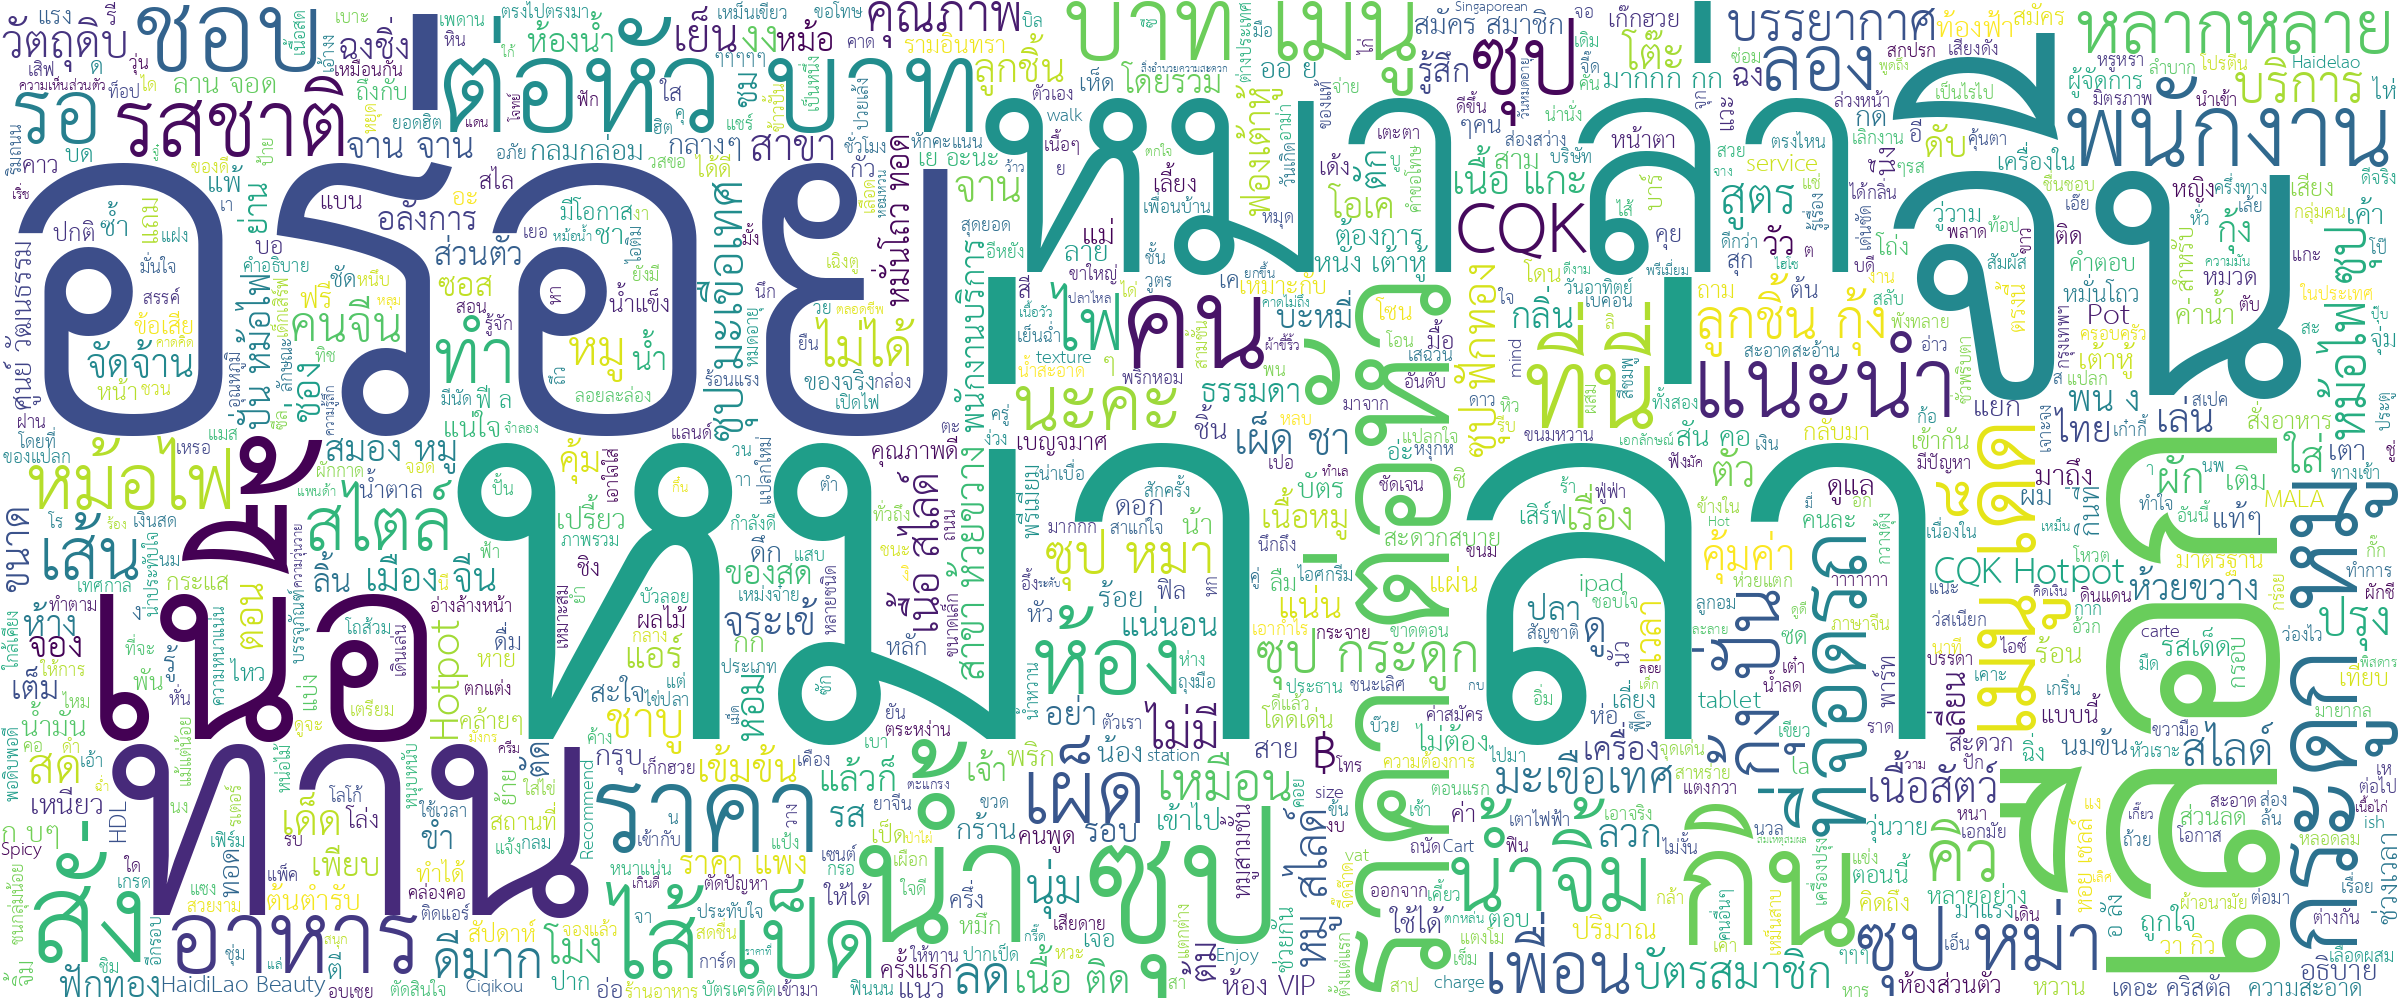

In [27]:
wordcloud.to_image()